In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing as preprocessing
import time

In [3]:
int_vars = ['Age', 'fnlwgt', 'Education Num', 'Capital Gain', 'Capital Loss', 'Hours Per Week']
dtypes = {x: np.int32 for x in int_vars}

In [4]:
df = pd.read_csv('adult.data.txt',
                   names=['Age', 'Workclass', 'fnlwgt', 'Education', 'Education Num',
                          'Marital Status', 'Occupation', 'Relationship', 'Race',
                          'Sex', 'Capital Gain', 'Capital Loss', 'Hours Per Week', 'Native Country', 'Target'],
                   sep=r'\s*,\s*', engine='python', na_values='?', dtype=dtypes
                )
df = df[df['Native Country'] == 'United-States']
df = df.dropna(axis=0)

In [5]:
del df['Education']
del df['Native Country']
# df.fillna('', inplace=True)
print(df.shape)

(41292, 13)


In [6]:
df.head(10)

,Age,Workclass,fnlwgt,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Target
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K
7,63,Self-emp-not-inc,104626,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,>50K
8,24,Private,369667,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,<=50K
9,55,Private,104996,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,<=50K
10,65,Private,184454,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,>50K
11,36,Federal-gov,212465,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,<=50K


In [7]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'Female' else 0)
def convert_labels(x):
    if x == '<=50K':
        return 0
    else:
        return 1
df['Target'] = df['Target'].apply(convert_labels)
df.head(10)

,Age,Workclass,fnlwgt,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Target
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,1
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,0,0,0,30,0
7,63,Self-emp-not-inc,104626,15,Married-civ-spouse,Prof-specialty,Husband,White,0,3103,0,32,1
8,24,Private,369667,10,Never-married,Other-service,Unmarried,White,1,0,0,40,0
9,55,Private,104996,4,Married-civ-spouse,Craft-repair,Husband,White,0,0,0,10,0
10,65,Private,184454,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,6418,0,40,1
11,36,Federal-gov,212465,13,Married-civ-spouse,Adm-clerical,Husband,White,0,0,0,40,0


In [8]:
df = pd.get_dummies(df, columns=['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race'])

In [9]:
df.columns

Index(['Age', 'fnlwgt', 'Education Num', 'Sex', 'Capital Gain', 'Capital Loss',
       'Hours Per Week', 'Target', 'Workclass_Federal-gov',
       'Workclass_Local-gov', 'Workclass_Private', 'Workclass_Self-emp-inc',
       'Workclass_Self-emp-not-inc', 'Workclass_State-gov',
       'Workclass_Without-pay', 'Marital Status_Divorced',
       'Marital Status_Married-AF-spouse', 'Marital Status_Married-civ-spouse',
       'Marital Status_Married-spouse-absent', 'Marital Status_Never-married',
       'Marital Status_Separated', 'Marital Status_Widowed',
       'Occupation_Adm-clerical', 'Occupation_Armed-Forces',
       'Occupation_Craft-repair', 'Occupation_Exec-managerial',
       'Occupation_Farming-fishing', 'Occupation_Handlers-cleaners',
       'Occupation_Machine-op-inspct', 'Occupation_Other-service',
       'Occupation_Priv-house-serv', 'Occupation_Prof-specialty',
       'Occupation_Protective-serv', 'Occupation_Sales',
       'Occupation_Tech-support', 'Occupation_Transport-movi

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    df[list(set(df.columns) - set(['Target']))],
    df['Target'], train_size=0.70)
# scaler = preprocessing.StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train.astype('float32')), columns=X_train.columns)
# X_test = scaler.transform(X_test.astype('float32'))

In [39]:
def boosting_estimators():
    max_estimators = [2, 4, 6, 8, 10, 12, 16, 18, 20, 25, 30, 40]

    columns = ['Max Estimators', 'Training Score', 'Test Score', 'Train Time', 'Test Time']
    df = pd.DataFrame(columns=columns)

    for estimator in max_estimators:
        start_train = time.time()
        dt = AdaBoostClassifier(n_estimators=estimator)
        print(dt)
        dt.fit(X_train, y_train)
        end_train = time.time() - start_train

        train_score = dt.score(X_train, y_train)
        start_test = time.time()
        test_score = dt.score(X_test, y_test)
        end_test = time.time() - start_test

        values = [estimator, train_score, test_score, end_train, end_test]
        df.loc[len(df)] = values

        print(' '.join(str(col) for col in columns))
        print(' '.join(str(val) for val in values))

    df.to_excel('adult_adaboost_estimators.xls')
boosting_estimators()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=2, random_state=None)
Max Estimators Training Score Test Score Train Time Test Time
2 0.813797398284 0.809654504359 0.06700658798217773 0.01562976837158203
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=4, random_state=None)
Max Estimators Training Score Test Score Train Time Test Time
4 0.838880431774 0.833306425573 0.10005474090576172 0.020116806030273438
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=6, random_state=None)
Max Estimators Training Score Test Score Train Time Test Time
6 0.844934957099 0.839199225057 0.12330389022827148 0.02805304527282715
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=8, random_state=None)
Max Estimators Training Score Test Score Train Time Test Time
8 0.848256296706 0.839037778495 0.1

In [40]:
from sklearn.cluster import KMeans

In [41]:
def kmeans():
    n_clusters = [x for x in range(2,11)]

    columns = ['Num Clusters', 'Score', 'Train Time', 'Test Time']
    results = pd.DataFrame(columns=columns)

    for n in n_clusters:
        start_train = time.time()
        k_means = KMeans(n_clusters=n, random_state=42).fit(X_train)
        print(k_means)
        end_train = time.time() - start_train

        start_test = time.time()
        score = k_means.score(X_test)
        end_test = time.time() - start_test

        values = [n, score, end_train, end_test]
        results.loc[len(results)] = values

        print(' '.join(str(col) for col in columns))
        print(' '.join(str(val) for val in values))

    results.to_excel('adult_kmeans.xls')
kmeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Num Clusters Score Train Time Test Time
2 -5.99243087443e+13 0.7916414737701416 0.0
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Num Clusters Score Train Time Test Time
3 -3.33455358698e+13 1.0061073303222656 0.01562952995300293
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Num Clusters Score Train Time Test Time
4 -2.26332430572e+13 1.4862689971923828 0.015627145767211914
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001

PermissionError: [Errno 13] Permission denied: 'adult_kmeans.xls'

In [42]:
from sklearn.mixture import GaussianMixture

In [43]:
def expectation_maximization():
    n_clusters = [x for x in range(2,11)]

    columns = ['Num Clusters', 'Score', 'Train Time', 'Test Time']
    results = pd.DataFrame(columns=columns)

    for n in n_clusters:
        start_train = time.time()
        gm = GaussianMixture(n_components =n, random_state=42).fit(X_train)
        print(gm)
        end_train = time.time() - start_train

        start_test = time.time()
        score = gm.score(X_test)
        end_test = time.time() - start_test

        values = [n, score, end_train, end_test]
        results.loc[len(results)] = values

        print(' '.join(str(col) for col in columns))
        print(' '.join(str(val) for val in values))

    results.to_excel('adult_expectation_maximization.xls')
expectation_maximization()

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
Num Clusters Score Train Time Test Time
2 -1.58597248716 0.6919608116149902 0.01975107192993164
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
Num Clusters Score Train Time Test Time
3 4.31513220417 2.1515488624572754 0.04958677291870117
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_star

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=10)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
pca.explained_variance_ratio_

array([  9.94787889e-01,   5.19669819e-03,   1.53838937e-05,
         1.62423156e-08,   1.23880233e-08,   4.92379167e-10,
         5.74824536e-11,   2.13039364e-11,   2.09337521e-11,
         1.73294554e-11])

In [48]:
X_train_pca = pca.transform(X_train)

In [53]:
X_train.shape

(28904, 46)

In [54]:
from sklearn.decomposition import FastICA

In [55]:
ica = FastICA(n_components=10)
X_train_ica = pca.fit_transform(X_train)

In [57]:
X_train_ica.shape

(28904, 10)

In [63]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
johnson_lindenstrauss_min_dim(n_samples=2.9e4, eps=0.9)

253

In [64]:
from sklearn.random_projection import GaussianRandomProjection

In [67]:
randomized_projection = GaussianRandomProjection(n_components=10)

In [68]:
X_train_rand_proj = randomized_projection.fit_transform(X_train)

In [69]:
X_train_rand_proj.shape

(28904, 10)

In [74]:
from sklearn.decomposition import LatentDirichletAllocation

In [76]:
lda = LatentDirichletAllocation(n_topics=10, learning_method='batch', n_jobs=-1)
X_train_lda = lda.fit_transform(X_train)

In [77]:
X_train_lda.shape

(28904, 10)

In [80]:
from sklearn.model_selection import KFold

In [94]:
kf = KFold(n_splits=5)

In [99]:
for train, test in kf.split(X_train):
    a,b = X_train.iloc[train], X_train.iloc[test]

In [106]:
if type(X_train_lda) is np.ndarray:
    print('hi')
    b = pd.DataFrame(X_train_lda)

hi


In [109]:
# type(b)
X_train_lda.shape

(28904, 10)

In [111]:
pd.DataFrame(X_train_ica)

,0,1,2,3,4,5,6,7,8,9
0,127138.603439,-1113.788064,-92.321880,-19.509029,-9.551640,-0.401375,-0.010884,-0.320266,-0.038459,0.422742
1,-150985.809113,3511.483765,-88.785699,0.081576,-1.586023,0.286925,0.698405,-0.290927,-0.440927,-0.861718
2,138902.603374,-1112.740154,-92.086778,-13.062152,5.069445,1.051310,0.536389,-0.600378,-0.112278,-0.325355
3,-71315.395909,-1131.425092,-95.773955,3.000440,6.662319,0.331480,-0.797183,0.279675,0.606353,-0.129722
4,29256.603506,-1122.482837,-93.961529,18.103377,-8.532718,1.100004,1.093541,0.804285,-0.432039,-0.199748
5,-27868.430897,-1131.141393,1881.980306,-1.350801,-9.069892,-3.180325,0.112338,0.776298,0.748017,-0.111210
6,1101.603756,-1124.987135,-94.484249,6.090792,2.120739,0.274131,0.778793,-0.343984,-0.420059,-0.777428
7,74660.603242,-1118.449322,-93.185879,16.017477,-44.582841,-0.915071,1.180718,-0.627719,-0.354599,0.184271
8,-56835.395741,-1130.145125,-95.615856,-29.290976,-15.325871,-0.656718,0.023745,0.021931,-0.141793,0.345586
9,-25865.396136,-1127.385046,-94.969877,4.797706,-2.809438,1.130004,-0.895031,-0.039125,-0.399109,-0.004119


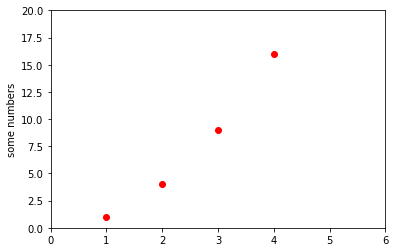

In [113]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.ylabel('some numbers')
plt.axis([0,6,0,20])
plt.show()

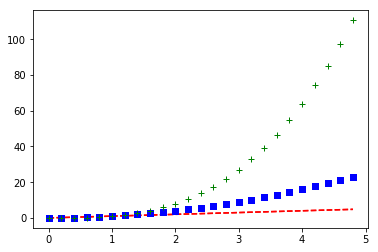

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g+')
plt.show()

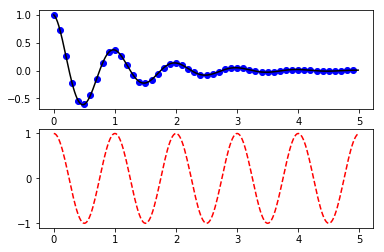

In [125]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

In [129]:
X_train.shape

(28904, 46)

In [130]:
X_test.shape

(12388, 46)

In [133]:
X_train.append(X_test).shape

(41292, 46)

In [134]:
X_train.shape

(28904, 46)

In [136]:
k_means = KMeans(n_clusters=3, n_jobs=-1).fit(X_train)

In [152]:
np.unique(k_means.predict(X_train))

array([0, 1, 2])

In [158]:
X_train['stuff'] = pd.Series(k_means.predict(X_train))

In [168]:
X_train.index = range(X_train.shape[0])

In [171]:
X_train['Clusters'] = pd.Series(k_means.predict(X_train))

In [173]:
X_train

,Relationship_Not-in-family,Relationship_Other-relative,Marital Status_Married-AF-spouse,Occupation_Other-service,fnlwgt,Occupation_Sales,Occupation_Farming-fishing,Relationship_Husband,Workclass_Local-gov,Age,...,Occupation_Prof-specialty,Workclass_Without-pay,Marital Status_Separated,Workclass_Federal-gov,Race_Other,Race_Amer-Indian-Eskimo,Occupation_Craft-repair,Hours Per Week,Marital Status_Never-married,Clusters
0,0,0,0,0,314823,0,0,0,0,23,...,0,0,0,0,0,0,0,24,1,1
1,1,0,0,0,36699,0,0,0,0,41,...,0,0,0,0,0,0,0,40,0,2
2,1,0,0,0,326587,0,0,0,0,23,...,0,0,0,0,0,0,0,40,1,1
3,0,0,0,0,116369,0,0,1,0,39,...,0,0,0,1,0,0,0,48,0,2
4,0,0,0,0,216941,0,0,0,0,58,...,0,0,0,0,0,0,0,40,0,0
5,0,0,0,0,159816,0,0,0,1,45,...,1,0,0,0,0,0,0,35,0,0
6,1,0,0,0,188786,0,0,0,0,43,...,0,0,0,0,0,0,0,45,0,0
7,1,0,0,0,262345,0,0,0,0,70,...,0,0,0,0,0,0,0,6,1,0
8,0,0,0,0,130849,1,0,0,0,18,...,0,0,0,0,0,0,0,15,1,2
9,0,0,0,0,161819,0,0,1,0,44,...,0,0,0,0,0,0,0,40,0,0


In [146]:
pd.DataFrame(k_means.predict(X_train))

,0
0,1
1,2
2,1
3,2
4,0
5,0
6,0
7,0
8,2
9,0


In [167]:
[range(X_train.shape[0])]

[range(0, 28904)]

In [175]:
X_train.append(X_train)

,Relationship_Not-in-family,Relationship_Other-relative,Marital Status_Married-AF-spouse,Occupation_Other-service,fnlwgt,Occupation_Sales,Occupation_Farming-fishing,Relationship_Husband,Workclass_Local-gov,Age,...,Occupation_Prof-specialty,Workclass_Without-pay,Marital Status_Separated,Workclass_Federal-gov,Race_Other,Race_Amer-Indian-Eskimo,Occupation_Craft-repair,Hours Per Week,Marital Status_Never-married,Clusters
0,0,0,0,0,314823,0,0,0,0,23,...,0,0,0,0,0,0,0,24,1,1
1,1,0,0,0,36699,0,0,0,0,41,...,0,0,0,0,0,0,0,40,0,2
2,1,0,0,0,326587,0,0,0,0,23,...,0,0,0,0,0,0,0,40,1,1
3,0,0,0,0,116369,0,0,1,0,39,...,0,0,0,1,0,0,0,48,0,2
4,0,0,0,0,216941,0,0,0,0,58,...,0,0,0,0,0,0,0,40,0,0
5,0,0,0,0,159816,0,0,0,1,45,...,1,0,0,0,0,0,0,35,0,0
6,1,0,0,0,188786,0,0,0,0,43,...,0,0,0,0,0,0,0,45,0,0
7,1,0,0,0,262345,0,0,0,0,70,...,0,0,0,0,0,0,0,6,1,0
8,0,0,0,0,130849,1,0,0,0,18,...,0,0,0,0,0,0,0,15,1,2
9,0,0,0,0,161819,0,0,1,0,44,...,0,0,0,0,0,0,0,40,0,0


In [176]:
X_train.shape

(28904, 47)

In [177]:
X_train.append(X_train)

,Relationship_Not-in-family,Relationship_Other-relative,Marital Status_Married-AF-spouse,Occupation_Other-service,fnlwgt,Occupation_Sales,Occupation_Farming-fishing,Relationship_Husband,Workclass_Local-gov,Age,...,Occupation_Prof-specialty,Workclass_Without-pay,Marital Status_Separated,Workclass_Federal-gov,Race_Other,Race_Amer-Indian-Eskimo,Occupation_Craft-repair,Hours Per Week,Marital Status_Never-married,Clusters
0,0,0,0,0,314823,0,0,0,0,23,...,0,0,0,0,0,0,0,24,1,1
1,1,0,0,0,36699,0,0,0,0,41,...,0,0,0,0,0,0,0,40,0,2
2,1,0,0,0,326587,0,0,0,0,23,...,0,0,0,0,0,0,0,40,1,1
3,0,0,0,0,116369,0,0,1,0,39,...,0,0,0,1,0,0,0,48,0,2
4,0,0,0,0,216941,0,0,0,0,58,...,0,0,0,0,0,0,0,40,0,0
5,0,0,0,0,159816,0,0,0,1,45,...,1,0,0,0,0,0,0,35,0,0
6,1,0,0,0,188786,0,0,0,0,43,...,0,0,0,0,0,0,0,45,0,0
7,1,0,0,0,262345,0,0,0,0,70,...,0,0,0,0,0,0,0,6,1,0
8,0,0,0,0,130849,1,0,0,0,18,...,0,0,0,0,0,0,0,15,1,2
9,0,0,0,0,161819,0,0,1,0,44,...,0,0,0,0,0,0,0,40,0,0


In [184]:
type(pd.concat([X_train] * 2, ignore_index=True).index)

pandas.core.indexes.range.RangeIndex

In [182]:
type(X_train.columns)

pandas.core.indexes.base.Index

Rp5 .8344 10m 32s, PC5 10m 27s .8384, IC5 10m 22s .7479, LDA21 .7801 17m 38s, overall7 10m 47s .8531, Double3_3 .8505 20m 26s, KMeans0_4 .8477 10m 18s, EM0_8 .8470 10m 16s